## Air Bnb Capstone ##

### Can I buy a property that pays for itself in NYC? ###

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

In [8]:
lst = pd.read_csv('~/Downloads/listings.csv', delimiter = ',', header = 0)
#cal = pd.read_csv('~/Downloads/listings.csv.gz', delimiter = ',', header = 0)
rev = pd.read_csv('~/Downloads/reviews.csv', delimiter = ',', header = 0)
hood = pd.read_csv('~/Downloads/neighbourhoods.csv', delimiter = ',', header = 0)

/Users/belisariomontesinos/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
rev.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2060,158,2008-09-22,2865,Thom,"very nice neighborhood,close enough to ""A"" tra..."
1,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r\nNous avons app...


In [10]:
lst.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200707031313,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200707031313,2020-07-08,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.37


In [11]:
lst.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [12]:
#lst.iloc[:, [61]]
#lst.iloc[:, [62]]
#lst.iloc[:, [94]]

In [23]:
#lst.info()
lst.describe()
#lst.shape

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.858800e+04,4.858800e+04,0.0,0.0,0.0,4.858800e+04,48576.000000,48576.000000,48588.000000,48588.000000,...,36247.000000,36219.000000,36238.000000,36215.000000,36216.000000,48588.000000,48588.000000,48588.000000,48588.000000,37230.000000
mean,2.306509e+07,2.020071e+13,NaN,NaN,NaN,8.548647e+07,16.138710,16.138710,40.729365,-73.951143,...,9.269043,9.726470,9.727413,9.592572,9.382069,5.917140,3.698053,2.020931,0.095415,0.959229
std,1.362972e+07,0.000000e+00,NaN,NaN,NaN,9.959082e+07,122.046309,122.046309,0.054881,0.047500,...,1.128800,0.790166,0.819118,0.791750,0.978356,23.556815,21.313062,10.265608,0.849292,1.304544
min,2.060000e+03,2.020071e+13,NaN,NaN,NaN,2.259000e+03,0.000000,0.000000,40.499790,-74.240840,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.085637e+07,2.020071e+13,NaN,NaN,NaN,9.232804e+06,1.000000,1.000000,40.689920,-73.983380,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.140000
50%,2.236088e+07,2.020071e+13,NaN,NaN,NaN,3.784629e+07,1.000000,1.000000,40.724060,-73.955425,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.420000
75%,3.577099e+07,2.020071e+13,NaN,NaN,NaN,1.377744e+08,2.000000,2.000000,40.763023,-73.934430,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,1.000000,0.000000,1.320000
max,4.410453e+07,2.020071e+13,NaN,NaN,NaN,3.539906e+08,1834.000000,1834.000000,40.911690,-73.712990,...,10.000000,10.000000,10.000000,10.000000,10.000000,261.000000,261.000000,148.000000,24.000000,50.290000


In [14]:
hstlst = lst['host_listings_count']
hstlst.max()

1834.0

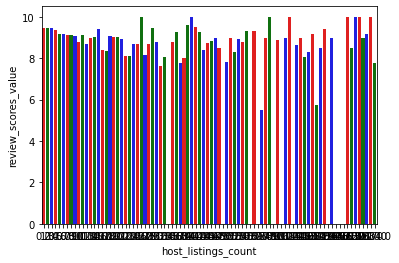

In [15]:
ax = sns.barplot(x = 'host_listings_count' , y = 'review_scores_value', data = lst, palette = ["red", "green", "blue"], ci = False)

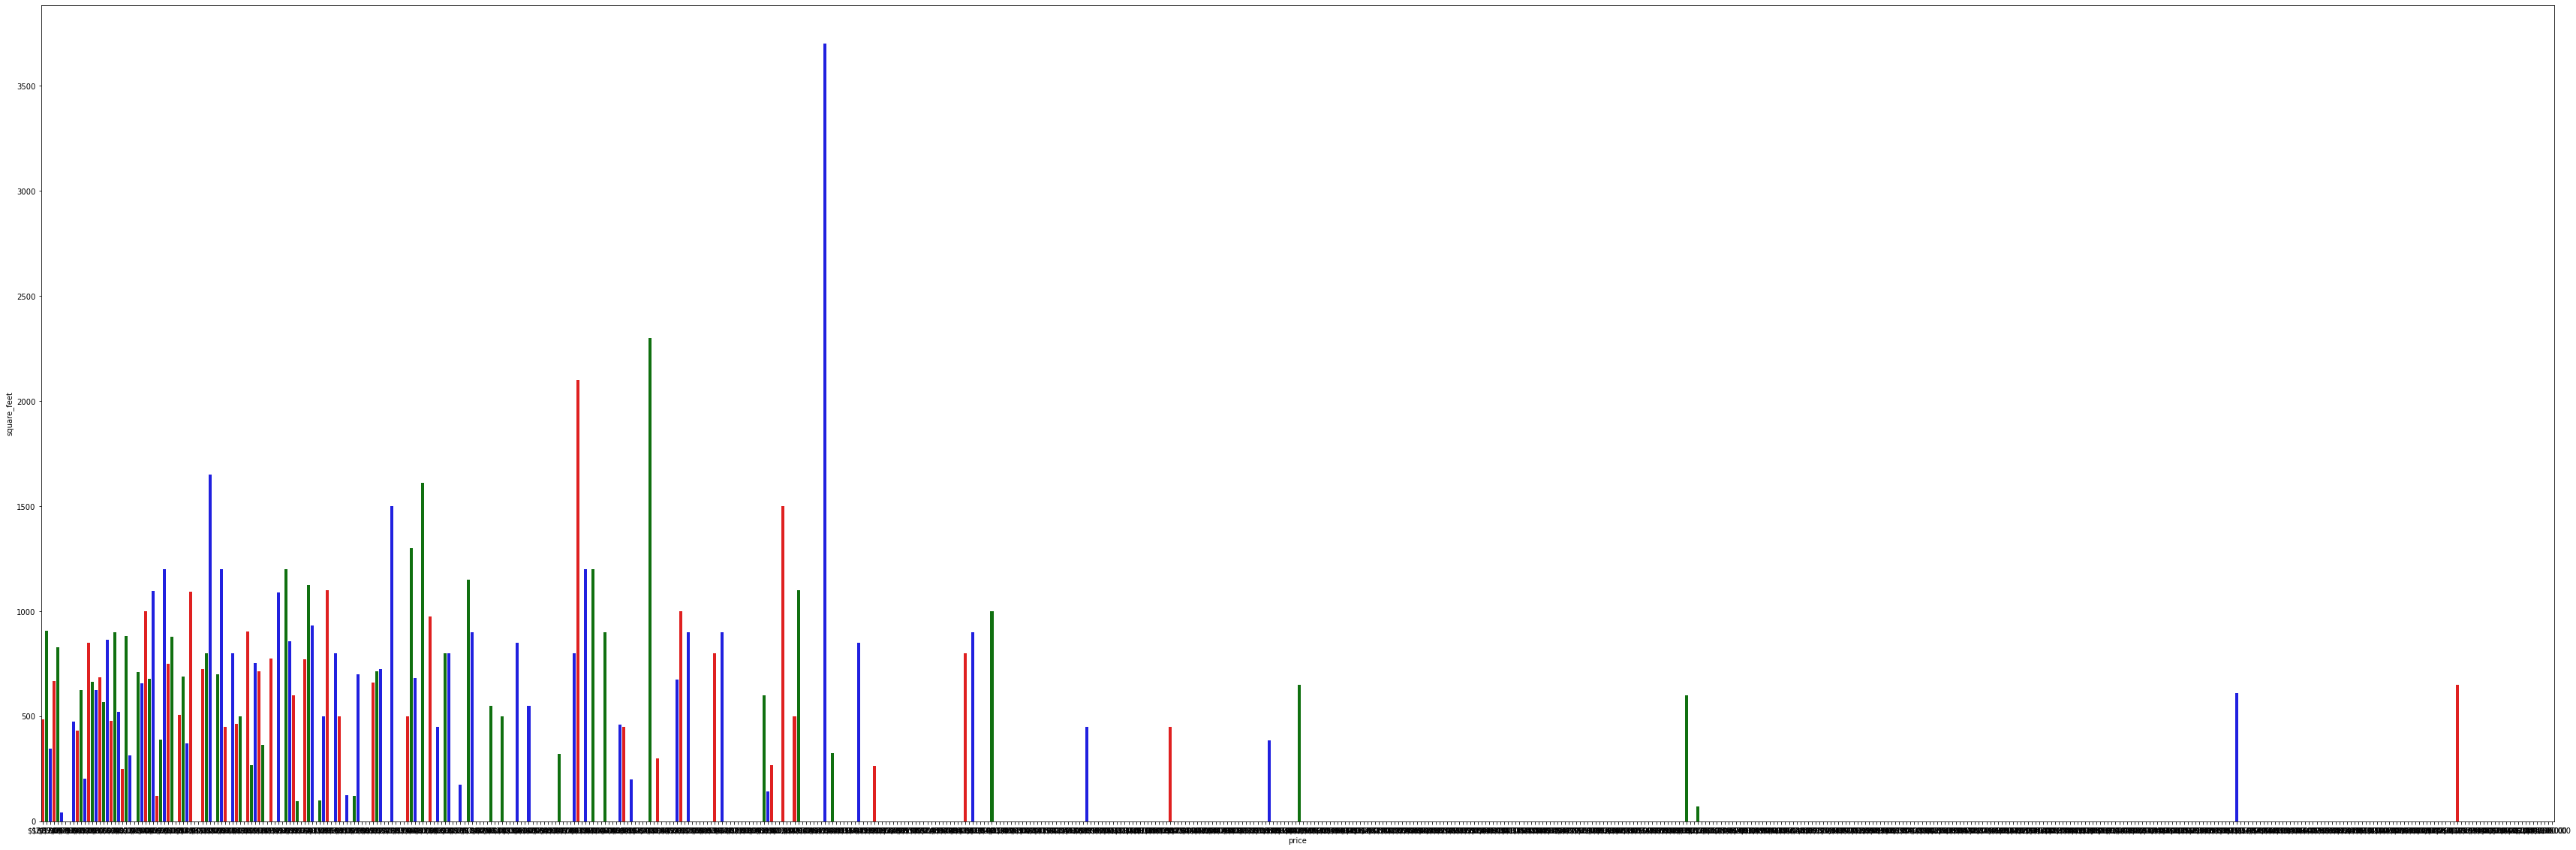

In [28]:
plt.figure(figsize=(60,20))
pricexfeet = sns.barplot(x = 'price' , y = 'square_feet', data = lst, palette = ["red", "green", "blue"], ci = False) 

In [17]:
price_range = pd.DataFrame(lst.groupby(['price']))
price_range

,0,1
0,$0.00,id lis...
1,"$1,000.00",id lis...
2,"$1,001.00",id lis...
3,"$1,002.00",id lis...
4,"$1,020.00",id lis...
...,...,...
657,$980.00,id lis...
658,$985.00,id listin...
659,$99.00,id lis...
660,$995.00,id lis...


In [29]:
lst['price'] = lst['price'].str.replace('$', '')
lst['price'] = lst['price'].str.replace(',', '')
lst['price'] = lst['price'].astype(float)
lst.nlargest(100,['price'])['price']

15160    10000.0
15206    10000.0
22449    10000.0
24396    10000.0
32240    10000.0
          ...   
3168      5250.0
16484     5000.0
19408     5000.0
21702     5000.0
21712     5000.0
Name: price, Length: 100, dtype: float64

In [ ]:
##GET a count for listings per price, make a histogram so they are bunched(sns), make it a field - a new column categorized by range

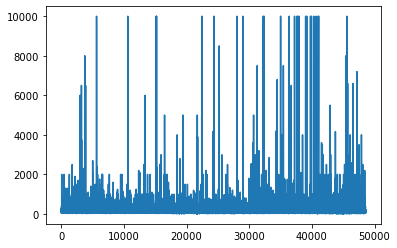

In [30]:
lst['price'].plot.line()


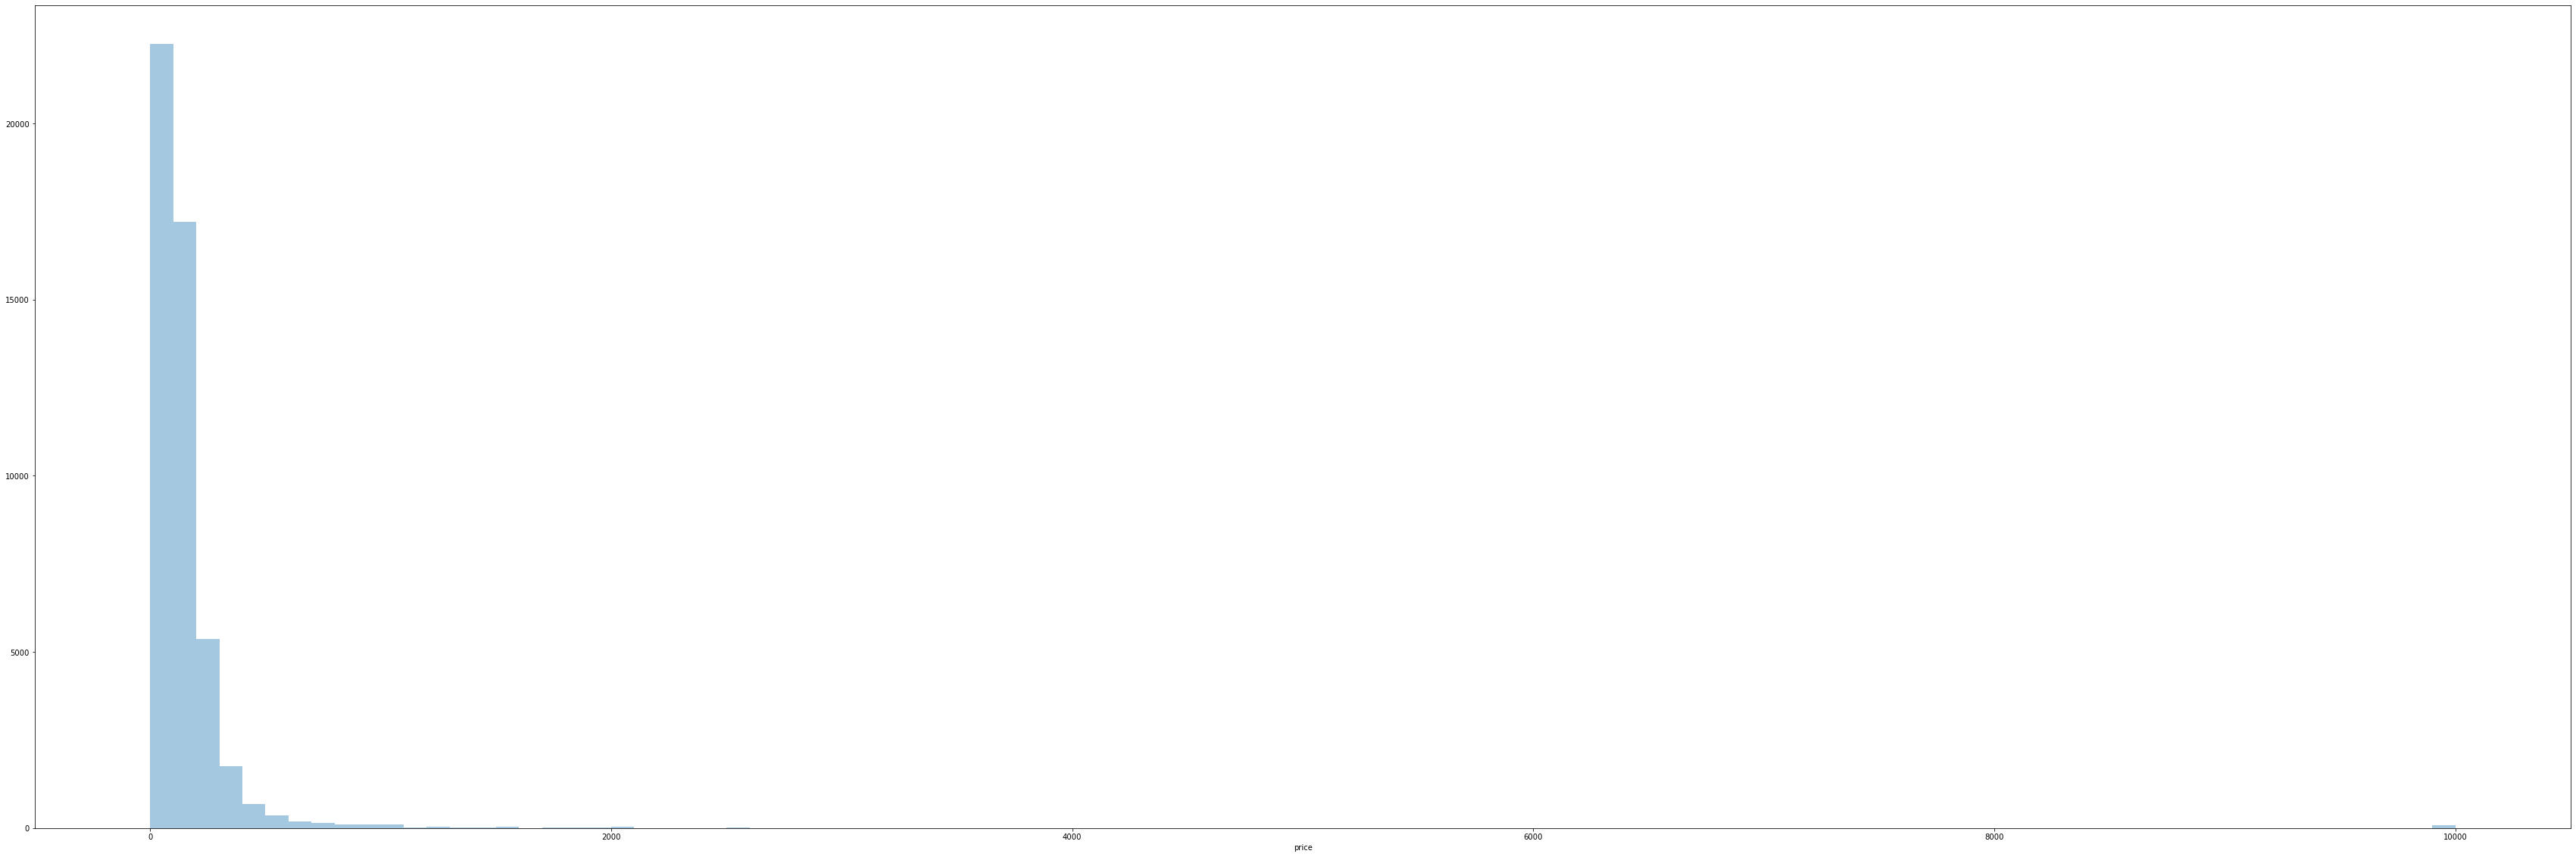

In [36]:
plt.figure(figsize=(60,20))
sns.distplot(lst['price'], bins=100, kde=False);

In [40]:
##new dataframe using loc - from lst price less <= x. 
canbuy = lst.loc[(lst['price'] <= 2000)]
canbuy.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200707031313,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200707031313,2020-07-08,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.37


In [53]:
#hoodgroup = pd.DataFrame(canbuy.groupby('neighbourhood')['price'].count())

hoodgrpup = canbuy.groupby('neighbourhood').agg(count=('neighbourhood', 'size'), mean_sent=('price', 'mean')).reset_index()
hoodgroup

,price
neighbourhood,
Allerton,7
Alphabet City,266
Annadale,2
Astoria,655
Bath Beach,10
...,...
Williamsburg,1634
Windsor Terrace,61
Woodhaven,54


In [55]:
hoodgroups = canbuy.groupby('neighbourhood').agg(count=('neighbourhood', 'size'), mean_price=('price', 'mean')).reset_index()
hoodgroups

,neighbourhood,count,mean_price
0,Allerton,7,61.571429
1,Alphabet City,266,163.642857
2,Annadale,2,131.500000
3,Astoria,655,102.677863
4,Bath Beach,10,103.700000
...,...,...,...
190,Williamsburg,1634,138.243574
191,Windsor Terrace,61,120.442623
192,Woodhaven,54,73.666667
193,Woodlawn,1,250.000000


In [78]:
tophood = hoodgroups[hoodgroups['count'] > 100 ].sort_values(by=['count'], ascending=False)
tophood

,neighbourhood,count,mean_price
18,Brooklyn,10773,120.830595
107,Manhattan,10182,181.401395
144,Queens,3095,92.523102
10,Bedford-Stuyvesant,1702,106.968273
190,Williamsburg,1634,138.243574
84,Harlem,1521,117.892834
117,Midtown,1495,220.084950
23,Bushwick,916,84.930131
179,Upper West Side,837,187.076464
178,Upper East Side,810,178.617284


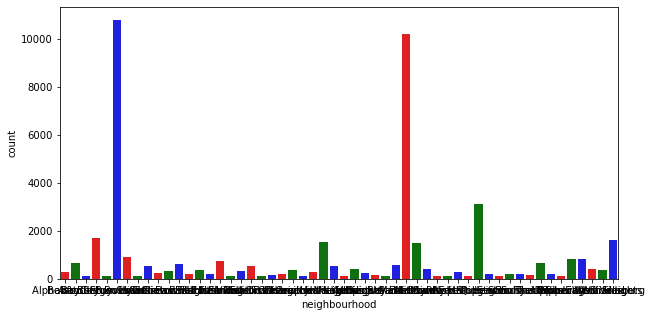

In [65]:
plt.figure(figsize=(10,5))
hoodcount = sns.barplot(x = 'neighbourhood' , y = 'count', data = tophood, palette = ["red", "green", "blue"], ci = False) 

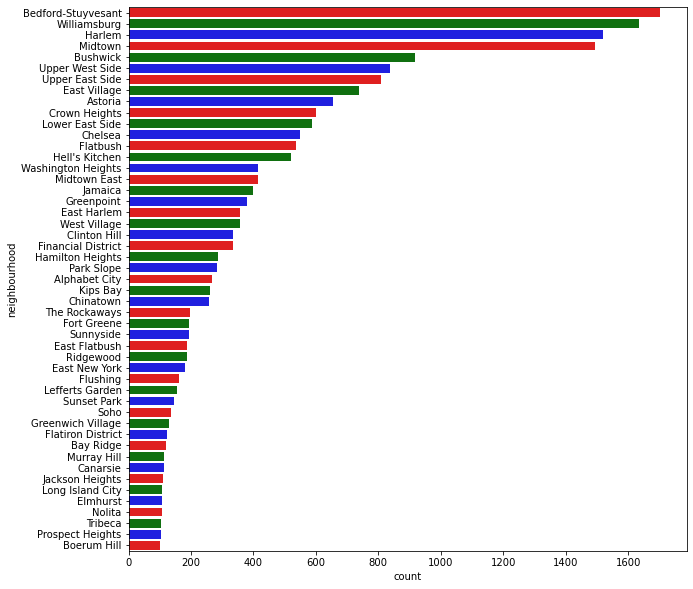

In [79]:
#th = tophood.drop(['Brooklyn', 'Manhattan', 'The Bronx'])
th = tophood.drop([18, 107, 144, 164, 167])

plt.figure(figsize=(10,10))
hoodscount = sns.barplot(x = 'count' , y = 'neighbourhood', data = th, palette = ["red", "green", "blue"],  ci = False) 

In [80]:
#canbuy where neighborhood in th
okay = canbuy[canbuy['neighbourhood'].isin(th['neighbourhood'])]
okay

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200707031313,2020-07-08,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
4,5099,https://www.airbnb.com/rooms/5099,20200707031313,2020-07-07,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.57
8,5203,https://www.airbnb.com/rooms/5203,20200707031313,2020-07-07,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Stay in my family's little guest room and enj...,"Our best guests are seeking a safe, clean, spa...",none,Our neighborhood is full of restaurants and ca...,...,f,f,flexible,t,t,1,0,1,0,0.89
9,5238,https://www.airbnb.com/rooms/5238,20200707031313,2020-07-08,Cute & Cozy Lower East Side 1 bdrm,"Live like a New Yorker instead of a stuffy, ti...",PLEASE NOTE: do not automatically book with ou...,"Live like a New Yorker instead of a stuffy, ti...",none,"Historically, the Lower East Side was a stoppi...",...,f,f,strict_14_with_grace_period,f,f,4,2,0,2,1.22
11,5803,https://www.airbnb.com/rooms/5803,20200707031313,2020-07-08,"Lovely Room 1, Garden, Best Area, Legal rental","Discounted now! Beautiful house, gorgeous ga...","Welcome to an historic, stunning 4-story Brook...","Discounted now! Beautiful house, gorgeous ga...",none,Neighborhood is amazing! Best subways to Manha...,...,f,f,strict_14_with_grace_period,t,f,3,1,2,0,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48564,44088976,https://www.airbnb.com/rooms/44088976,20200707031313,2020-07-08,Spacious work-from-home oasis,The ultimate work-from-home oasis. Newly renov...,Duplex condo apartment - garden level and firs...,The ultimate work-from-home oasis. Newly renov...,none,Clinton Hill - the heart of brownstone Brookly...,...,f,f,flexible,f,f,1,1,0,0,NaN
48565,44089440,https://www.airbnb.com/rooms/44089440,20200707031313,2020-07-08,Charming 2 bedroom in the heart of Astoria,Our charming 2-bedroom is perfect for your sta...,The second bedroom is currently styled as a ho...,Our charming 2-bedroom is perfect for your sta...,none,"Astoria, named the #1 coolest neighborhood in ...",...,t,f,flexible,f,f,1,1,0,0,NaN
48568,44097382,https://www.airbnb.com/rooms/44097382,20200707031313,2020-07-07,Get Inspired in SOHO - 1BR Apartment,This lovely 1BR apartment is located in prime ...,NaN,This lovely 1BR apartment is located in prime ...,none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
48575,44100164,https://www.airbnb.com/rooms/44100164,20200707031313,2020-07-08,"Modern, luxurious apt in NYC w/ private terrace!","Amazing, luxurious and modern 1 bedroom apt wi...",The space the layout of the apartment is: - Br...,"Amazing, luxurious and modern 1 bedroom apt wi...",none,NaN,...,t,f,flexible,f,f,1,1,0,0,NaN
